In [1]:
import sys; sys.path.insert(0, '..')

In [2]:
from scripts.get_data import ceramiche_DB
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from numpy import std
from matplotlib import pyplot as plt

In [3]:
X, y = ceramiche_DB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

..\dati_ceramiche_classi.xlsx


In [119]:
cvs = KMeans(n_clusters=2, verbose=2)
cvs.fit(X_train)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9307.351111376945
start iteration
done sorting
end inner loop
Iteration 1, inertia 9307.351111376945
center shift 0.000000e+00 within tolerance 4.048119e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 11831.03808142098
start iteration
done sorting
end inner loop
Iteration 1, inertia 10506.82109924118
start iteration
done sorting
end inner loop
Iteration 2, inertia 9520.783715786518
start iteration
done sorting
end inner loop
Iteration 3, inertia 9301.61477561445
start iteration
done sorting
end inner loop
Iteration 4, inertia 9301.61477561445
center shift 0.000000e+00 within tolerance 4.048119e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 10305.48905372644
start iteration
done sorting
end inner loop
Iteration 1, inertia 9301.61477561445
start iteration
done sorting
end inner loop
Iteration 2, inertia 9301.61

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=2)

In [120]:
score = 0
for t, p in zip(y_test, cvs.predict(X_test)):
    if t==p: #Usa label opposti rispetto al database
        score += 1
score = score/len(y_test)
if score < .5:
    score = 1-score
score

0.9117647058823529

In [124]:
scores=[]
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)
    cvs = KMeans(n_clusters=2)
    cvs.fit(X_train)

    score = 0
    for t, p in zip(y_test, cvs.predict(X_test)):
        if t==p:
            score += 1
    score = score/len(y_test)
    if score< .5: #I label usati dal classiificatori potrebbero essere quelli opposti dei test
        score = 1-score
    scores.append(score)
mean = sum(scores)/len(scores)
standardDeviation = std(scores)
print("ACCURACY:")
print("mean =", mean)
print("std =", standardDeviation)

ACCURACY:
mean = 0.9415294117647086
std = 0.034196865434368874


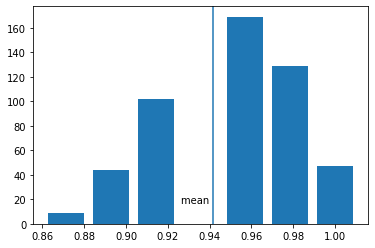

In [126]:
plt.hist(scores, bins=7, align='right', rwidth=.8, range=(.85, 1))
plt.axvline(x=mean, label='mean')
plt.text(mean, 17, 'mean ', horizontalalignment='right')
plt.show()